In [1]:
from nanugpt import utils


In [2]:
log_filepath = r"$OUT_DIR/grokking/seed_search_v1_baseline.txt"
#log_filepath = r"D:\Dropbox\out_dir\grokking\magic8_seed_search.txt"
#log_filepath = r"D:\Dropbox\out_dir\grokking\seed_search_wd0_magic8.txt"




In [3]:
with open(utils.full_path(log_filepath), 'r') as f:
    lines = f.readlines()

logs = []
for line in lines:
    if 'val/acc=' not in line:
        continue
    columns = line.split('[INFO] ')[1].split(',')
    log = {}
    for column in columns:
        if '=' in column:
            key, val = tuple(column.split('='))
            val = val.strip()
            if val.isnumeric():
                val = int(val)
            else:
                try:
                    val = float(val)
                except ValueError:
                    pass
            log[key.strip()] = val
    logs.append(log)
    
print('Number of logs: {}'.format(len(logs)))
print('Example log: {}'.format(logs[0]))

Number of logs: 498
Example log: {'seed': 20006, 'data_loader_seed': 31666, 'train/step': 2999, 'val/acc': 0.01103, 'val/loss': 11.28, 'train/acc': 0.9688, 'train/loss': 0.1463, 'w_norm': 64.51, 'lr': 0.001}


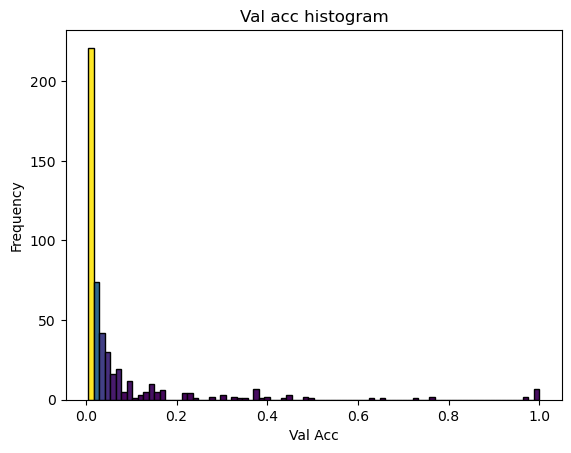

In [4]:
utils.draw_histogram([log['val/acc'] for log in logs if log['val/acc'] > 0], 'Val Acc', 'Frequency', 'Val acc histogram')

In [5]:
good_seeds = [log['seed'] for log in logs if log['val/acc'] > 0.98]
print([(bin(g),g) for g in good_seeds])
print('Number of good seeds: {}'.format(len(good_seeds)))
print('% of good seeds: {}%'.format(len(good_seeds) * 100.0 / len(logs)))

[('0b111000010100000', 28832), ('0b111010001010110', 29782), ('0b1010110101', 693), ('0b110011111000001', 26561), ('0b101011000111101', 22077), ('0b110011111000001', 26561), ('0b101011000111101', 22077)]
Number of good seeds: 7
% of good seeds: 1.4056224899598393%


In [6]:
normal_seeds = [log['seed'] for log in logs if log['val/acc'] < 0.25]
print('Number of normal seeds: {}'.format(len(normal_seeds)))
print('% of normal_seeds seeds: {}%'.format(len(normal_seeds) * 100.0 / len(logs)))

Number of normal seeds: 458
% of normal_seeds seeds: 91.96787148594377%


In [8]:
import numpy as np
import torch

def get_stats(nums):
    if isinstance(nums, torch.Tensor):
        nums = nums.detach().cpu().numpy()
    if isinstance(nums, list):
        nums = np.array(nums)
    nums = np.array(nums)
    return {'mean': np.mean(nums),
            'median': np.median(nums),
            'std': np.std(nums),
            'min': np.min(nums),
            'max': np.max(nums),
            'n': len(nums)}


print('Training stats:')
print(get_stats([log['train/acc'] for log in logs]))

print('Validation stats:')
print(get_stats([log['val/acc'] for log in logs]))

Training stats:
{'mean': 0.982108032128514, 'median': 0.9844, 'std': 0.012879449390770143, 'min': 0.8887, 'max': 1.0, 'n': 498}
Validation stats:
{'mean': 0.07977811445783133, 'median': 0.02216, 'std': 0.16585917088249374, 'min': 0.005696, 'max': 1.0, 'n': 498}


In [9]:
train_stats, val_stats = [], []
for i in range(2, len(logs)):
    ts = get_stats([log['train/acc'] for log in logs[:i]])
    vs = get_stats([log['val/acc'] for log in logs[:i]])
    train_stats.append(ts)
    val_stats.append(vs)

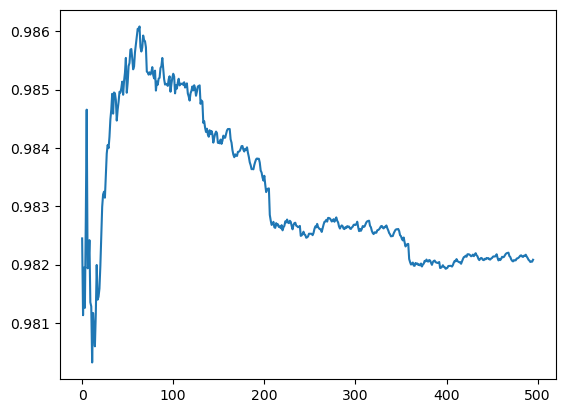

In [10]:
import matplotlib.pyplot as plt
plt.plot([ts['mean'] for ts in train_stats], label='train')

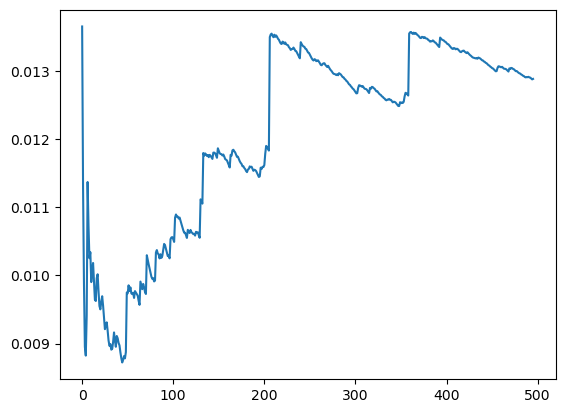

In [11]:
import matplotlib.pyplot as plt
plt.plot([ts['std'] for ts in train_stats], label='train')

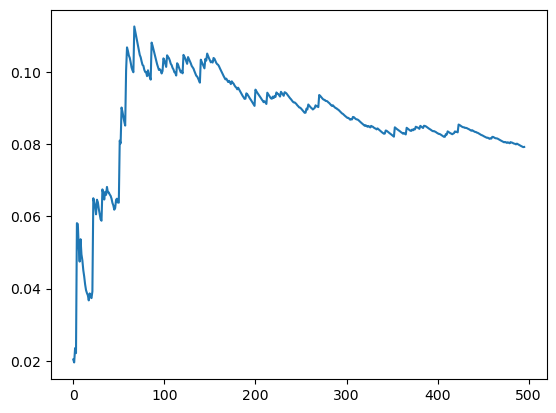

In [12]:
import matplotlib.pyplot as plt
plt.plot([ts['mean'] for ts in val_stats], label='val')

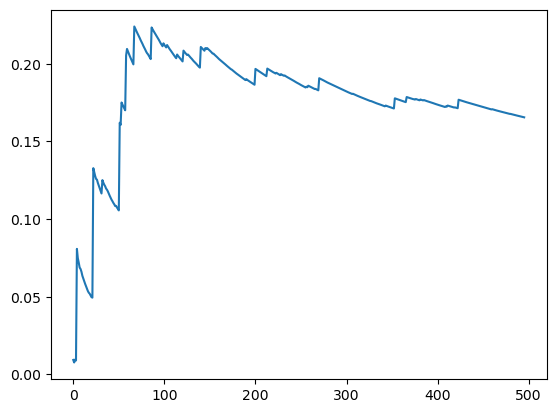

Bad pipe message: %s [b"6\xdb\xb2rW\x83\xd7C\xba<U}'\xb8D\xaa\xb9\xc2\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0"]
Bad pipe message: %s [b"\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0s\xc0w\x00\xc4\x00\xc3\xc0#\xc0'\x00g\x00@\xc0r\xc0"]
Bad pipe message: %s [b'\xf4\x91\xdb\xfdv\xc5\x11\xf8\xdd%\xad\xcb\xb5\x19\xfdR}\xdf\x00\x00>\xc0\x14\xc0\n\x009\x008\x007\x006\xc0\x0f\xc0\x05\x005\xc0\x13\xc0\t\x003\x002\x001\x000\xc0\x0e\xc0\x04\x00/\x00\x9a\x00\x99\x00\x98\x00\x97\x00\x96\x00\x07\xc0\x11\xc0\x07\xc0\x0c\xc0\x02\x00\x05\x00\x04\x00\xff\x02\x01\x00\x00C\x00\x00\x00\x0e\x00\x0c\x00\x00\t', b'7.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x1c\x00\x1a\x00\x17\x00\x19\x00\x1c\x00\x1b\x00\x18\x00\x1a\x00\x16\x00\x0e\x00\r\x00\x0b\x00\x0c\x00\t\x00\n\x00']
Bad pipe message: %s [b'\xbe\x00\xbd\xc0\n\xc0\x14\x009\x008\x00\x88\x00\x87\xc0\t\xc0\x13\x003\x002\x00\x9a\

In [13]:
import matplotlib.pyplot as plt
plt.plot([ts['std'] for ts in val_stats], label='train')